In [86]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [87]:
def draw_graph(graph):
    nx.draw(graph, with_labels=True)
    plt.show()

In [115]:
def random_edge(graph):
    edges = list(graph.edges)
    nonedges = list(nx.non_edges(graph))

    chosen_edge = random.choice(edges)
    chosen_nonedge = random.choice([x for x in nonedges if chosen_edge[0] == x[0] or chosen_edge[0] == x[1]])
    
    graph.add_edge(chosen_nonedge[0], chosen_nonedge[1])
    
    return graph

[0, 2, 15, 19]


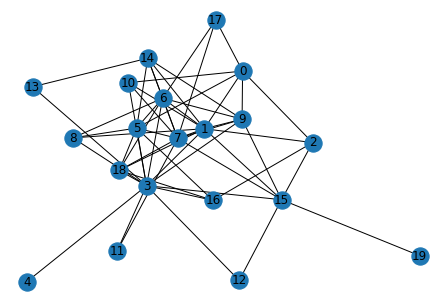

In [135]:
N = 20          # number of nodes (including source and destination)
edge_prob = 0.1 # edge probability

src = 0
dst = N - 1

G = nx.gnp_random_graph(N, edge_prob)

while not nx.is_connected(G):
    G = random_edge(G)

P = nx.shortest_path(G, src, dst)
print(P)


draw_graph(G)